In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 678.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


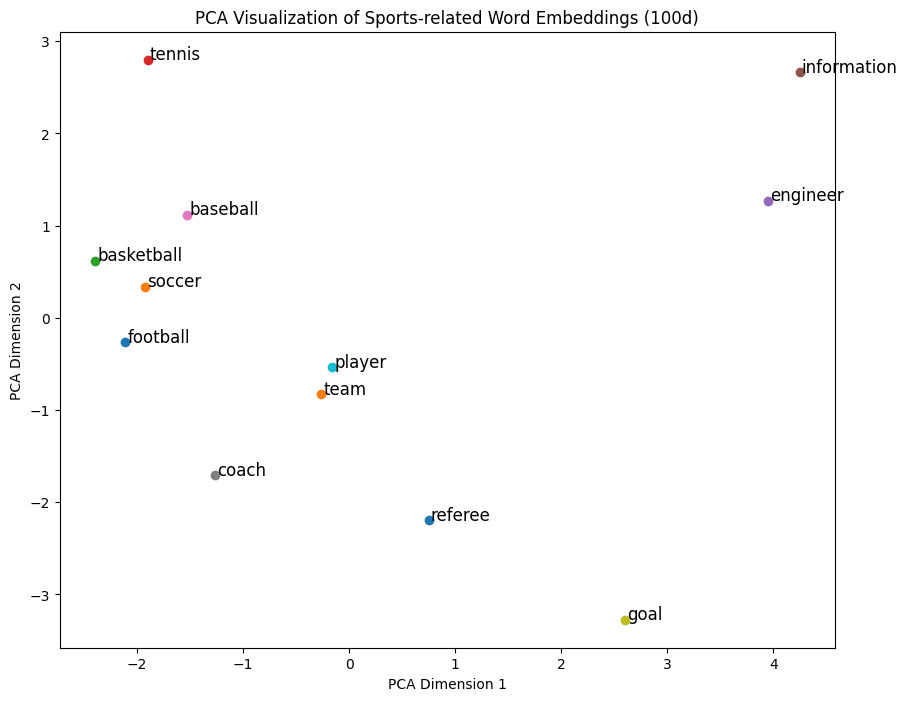

Words similar to 'football': [('soccer', 0.8732221722602844), ('basketball', 0.8555637001991272), ('league', 0.815336287021637), ('rugby', 0.8007532954216003), ('hockey', 0.7833694815635681)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
# Load pre-trained GloVe embeddings (100d model)
model_100d =KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.6B.100d.word2vec.txt", binary=False,limit=500000)
# Select 10 words from a specific domain (sports) # Included otherwords to show how embeddings are different
words = ['football', 'soccer', 'basketball',
'tennis','engineer','information', 'baseball', 'coach', 'goal',
'player', 'referee', 'team']
word_vectors = np.array([model_100d[word] for word in words])
# Dimensionality reduction using PCA
# Using PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)
# Plotting the words in 2D space
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
  plt.scatter(pca_result[i, 0], pca_result[i, 1])
  plt.text(pca_result[i, 0] + 0.02, pca_result[i, 1], word,fontsize=12)
plt.title("PCA Visualization of Sports-related Word Embeddings (100d)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()
# 5 Semantically Similar Words Generator Function
def get_similar_words(word, model, topn=5):
  similar_words = model.similar_by_word(word, topn=topn)
  return similar_words
# Example: Get 5 words similar to "football"
similar_words_football = get_similar_words('football', model_100d,topn=5)
print(f"Words similar to 'football': {similar_words_football}")

In [2]:
# Select the words you want to print embeddings for
words_to_print = ['football', 'soccer']
# Print their embeddings
for word in words_to_print:
  if word in model_100d:
    print(f"Vector embedding for '{word}':\n{model_100d[word]}\n")
  else:
    print(f"Word '{word}' not found in the embeddings model.")

Vector embedding for 'football':
[ 0.43865    0.10537    0.45972   -1.0724    -1.2471     0.76351
  0.47528    0.083857  -0.9127    -0.27328   -0.018591  -1.184
  0.22748    0.16847   -0.52158    0.11339    1.3757     0.11892
 -0.37683    0.51149   -0.8833     0.96259    0.18143   -0.407
  0.036181  -0.74432   -0.0027401 -0.70068    0.53103    0.45114
 -0.72884    1.0631    -0.28008   -0.63848    0.15645   -0.46927
 -1.0071     1.033     -1.4354    -0.27485    0.048984   0.13951
  0.43072   -0.78791    0.41097    0.58509    1.0155    -0.1839
  0.27487   -0.90866   -0.30441   -0.17396    0.020941   0.62813
  0.10978   -2.3885    -0.56364   -0.27193    0.98728    0.70608
 -0.512      0.52636   -0.78503   -0.68714    0.38121    0.097582
 -0.20237    0.43208   -0.30527    0.57925    0.62619   -0.47415
  0.33834   -0.28421   -0.097465   0.19597    0.54849    0.59918
 -0.41576    0.1021     0.6766     0.0042009 -0.12354   -0.76613
 -0.27436   -0.68248   -1.0789    -0.16708    0.81671    0.02